# 학습 목표

- 활성화 함수
- 경사하강법
- 오차역전파
- 손실함수

# 활성화 함수

- 이전층의 값을 다음 층으로 비선형 변환을 해서 전달하는 함수
- 실제 뉴런의 구조가 비선형으로 동작하기 때문
- 경험적으로 비선형 변환을 쓰는 것이 신경망 동작이 더 잘 되기 때문

#### 종류(사용되는 층)
- sigmoid(입력, 은닉, 출력)
- tanh(입력, 은닉)
- relu(입력, 은닉) 
- softmax(출력)

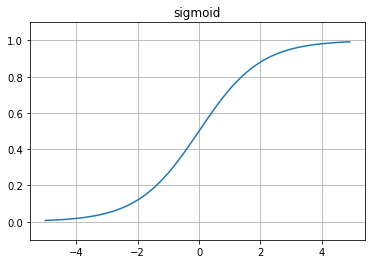

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 시그모이드 함수 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)   # y축 범위 지정
plt.grid("on")
plt.title("sigmoid")
plt.show()

### 오차역전파시 미분
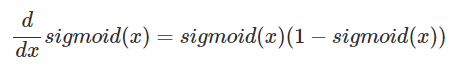

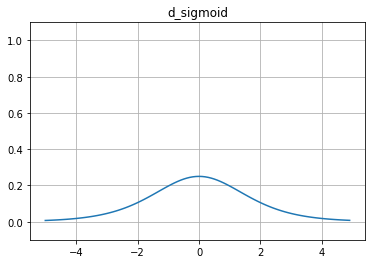

In [ ]:
# (미분)시그모이드
def d_sigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))

# (미분)시그모이드 함수 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = d_sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)   # y축 범위 지정
plt.grid("on")
plt.title("d_sigmoid")
plt.show()

# 최대값 0.25
# 오차역전파 시 활성화함수를 미분해서 곱하는데 층이 많아지면 활성화함수의 곱이 
# 0에 가까워져서 파라미터를 업데이트하지 못하는 문제가 발생 -> vanishing gradient (경사소실)

## tanh 함수

- sigmoid의 문제점을 해결하기 위한 대안

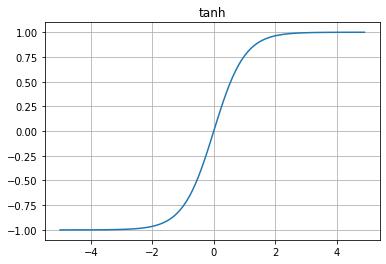

In [ ]:
# tanh 함수 (넘파이에 있음)
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)   # y축 범위 지정
plt.grid("on")
plt.title("tanh")
plt.show()

## tanh 미분
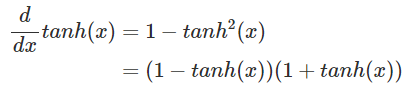

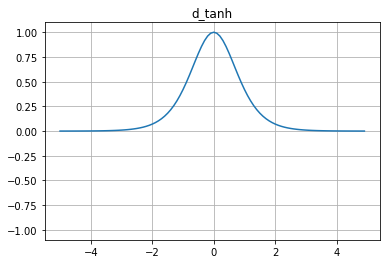

In [ ]:
# (미분)하이퍼볼릭 탄젠트
def d_tanh(x):
  return 1 - np.tanh(x) * np.tanh(x)

def d_tanh2(x):
  return (1 - np.tanh(x))(1 + np.tanh(x))  

# (미분)하이퍼볼릭 탄젠트 그래프 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = d_tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)   # y축 범위 지정
plt.grid("on")
plt.title("d_tanh")
plt.show()

# 최대값이 1이므로 sigmoid에 비해서 더 많이 곱할 수 있음
# 층이 깊어지면 0에 가까워짐

## relu 함수

- 0보다 작으면 0이고, 0보다 크면 x인 함수

In [ ]:
# 렐루 함수
def relu(x):
    return np.maximum(0, x)

# np.maximum함수는 두 입력 중 큰 값을 선택해 반환하는 함수

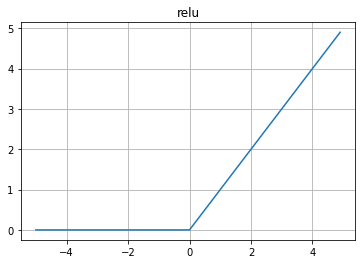

In [ ]:
# 렐루 함수 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.grid("on")
plt.title("relu")
plt.show()


## softmax 함수

- 원핫 인코딩된 이진분류나 다진분류의 출력층의 활성화함수로 사용
- 해당 출력들을 확률값으로 변환 (모든 출력의 합은 1이 된다)

- 이진분류 : 시그모이드
- 이진분류(원핫인코딩) : 소프트맥스
- GAN 같이 W,b 값으로 복원하려면 확률밀도함수 사용
- (생성모델링)할 때 다양한 렐루 사용

# 손실함수 (Loss Function) : 비용함수
 - 오차를 구하는 함수 (공식)

 - 딥러닝의 오차역전파에서 미분을 하게되는데 오차나 정확도는 상수라서 미분을 하면 0이 되기 때문에 함수 형태로 사용

 - 종류 : MSE(회귀용), CEE(분류용), binary_crossentropy(이진분류)

### 평균제곱 오차 (MSE : Mean Squares Error)

In [ ]:
# 오차제곱합(SSE)
def sum_squares_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

In [ ]:
# 평균제곱오차(MSE)
def mean_squares_error(y,t):
    return ((1/len(y)) * np.sum((y-t)**2))

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squares_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squares_error(np.array(y), np.array(t)))

### 교차엔트로피 오차 (CEE : Cross Entropy Error)

- 분류에서 CEE를 사용하는 이유 : 정확도가 상수이므로 미분하면 0이 되어 오차역전파에 사용할 수 없음

- 분류에서 MSE 사용하지 않는 이유 
  - MSE는 틀린 것에 더 집중하는 경향이 있음  
  (한쪽 측면만 보고 계산)
  - 2개 이상의 클래스를 판단하는 분류에서는 쓰기가 힘듬
  - MSE 쓸 때 활성화 함수 softmax 쓰는 경우, softmax를 미분하면 output * (1 - output) 값이 포함 -> 출력이 0이나 1에 가까워지면 W,b를 갱신하는 값이 0에 가까워져서 학습이 안되는 문제가 발생

In [ ]:
# 교차 엔트로피 오차(CEE)
def cross_entropy_error(y,t,n):
    return -np.sum(t * np.log(y+delta))

# 분류니까 0이 나올 수 있음
# 그런데 log 0은 무한대 그래서 로그할 땐 0이 되지 않도록 무언가의 값을 더해준다. (충분히 작은 값을)


In [ ]:
# 교차 엔트로피 오차(CEE)
def cross_entropy_error(y,t):
    delta = 1e-7 
    return -np.sum(t * np.log(y+delta))

# X가 특정 값을 가질 확률이 1이 되는 경우에 엔트로피는 최솟값이 된다.
# 이 때의 엔트로피 값은 0이 된다. 즉 불확실성이 감소할수록 엔트로피 값은 작아진다.

# 오차 역전파
- 오차와 파라미터의 비를 구해서 기존의 파라미터 값을 갱신하는 방법 (갱신은 오차가 감소하는 경우에만 갱신 -> 경사하강법)

1. Sequential : 신경망 생성
2. W, b 초기화 (랜덤)
3. 입력층에 특성데이터 입력
4. 순전파(추론, 예측)에 의한 결과 값 출력
5. 출력값을 바탕으로 오차 계산
6. 미분 : 오차/파라미터 비율 계산 # 오차에 파라미터W,b가 어떤 영향 줬는지 계산
7. 경사하강법 : 오차비율 즉 기울기를 이용해서 오차가 감소할 때만 W,b 갱신 
8. 역전파 : 입력까지 반복
9. 3~8번까지 에포크 횟수만큼 위 과정 반복

In [ ]:
import numpy as np

# 특성데이터, 라벨데이터, 반복수, 학습률
def fit_fun(X, y, epoch, lr):
  # (1) 파라미터 (w, b)를 초기화 (랜덤)
  w = np.random(4)
  b = np.random(1)
  print(f"초기 파라미터 : w ([{w}), b({b})")
  # (6) (2)-(5)까지를 epochs 만큼 반복
  for i in range(epoch):
  # (2) 특성데이터(X)를 입력해서 예측값 y를 계산
    pred_y = w * X + b
  # (3) 예측값 y와 실제값 yt의 차이를 계산 -> 오차 (e)
    e = y - pred_y
  # (4) 오차/파라미터의 비를 계산 (기울기, 미분)
    dw = e / w
    db = e / b
  # (5) 기존의 파라미터에 계산한 비를 더해주어 갱신 (단, 학습률만큼만 갱신) 학습률을 쓰는 이유 : 값이 너무 크게 변하는 것을 방지
    w = w + lr * dw   # 오차 기울기가 0에 가까워질수록 수정 작게 되고 
    b = b + lr * db   # 오차 기울기가 커지수록 수정 많이 됨

    print(f"반복수 : {i}, 예측값 : {pred_y}, 오차 : {e}")
    print(f"갱신된 파라미터 : w ([{w}), b({b})")


In [ ]:
import numpy as np

# 특성데이터, 라벨데이터, 반복수, 학습률
def fit_fun(X, y, epoch, lr) :
  #(1) 파라미터 (w, b)를 초기화 (랜덤)
  w = np.random.randn(1)
  b = np.random.randn(1)
  print(f"초기 파라미터 : w ({w}), b({b})")
  # (6) (2)-(5)까지를 epochs 만큼 반복
  for i in range(epoch) :
    #(2) 특성데이터(X)를 입력해서 예측값 y를 계산
    pred_y = w * X + b
    #(3) 예측값 y와 실제값 yt의 차이를 계산 -> 오차 (e)
    e = y - pred_y
    #(4) 오차/파라미터의 비를 계산 (기울기, 미분)
    dw = e / w
    db = e / b
    #(5) 기존의 파라미터에 계산한 비를 더해주어 갱신 (단, 학습률만큼만 갱신) - 학습
    w = w + lr * dw
    b = b + lr * db

    print(f"반복수 : {i}", end='\t')
    print(f"예측값 : {pred_y}", end='\t')
    print(f"오차 : {e}", end='\t')
    print(f"갱신된 파라미터 : w {w}", end='\t') 
    print(f"b{b}", end='\n')

In [ ]:
fit_fun(1, 3, 100, 0.1)

In [ ]:
def fit_fun2(X, y, epoch, lr):
  # (1) 파라미터 초기화
  w1 = np.random.random(1)
  w2 = np.random.random(1)
  b1 = np.random.random(1)
  b2 = np.random.random(1)

  #(6) (2) ~ (5)까지 반복
  for i in range(epoch):
    # (2) 1층/2층 출력 계산
    pred_y1 = w1 * X + b1
    pred_y2 = w2 * pred_y1 + b2
    # (3) 오차 계산 - 2층부터 계산
    e2 = y - pred_y2
    # (4) 2층에 대한 오차 역전파
    # 기울기
    dw2 = e2 / w2
    db2 = e2 / b2
    # 파라미터 갱신
    w2 = w2 + lr * dw2
    b2 = b2 + lr * db2
    
# !!! 어렵당
    #(5) 1층에 대한 오차 역전파 (2층을 거처온 오차)
    #기울기
    dw1 = pred_y1 * dw2 / w1
    db1 = pred_y1 * db2 / b1
    # 파라미터 갱신
    w1 = w1 + lr * dw1
    b1 = b1 + lr * db1

    print(f"반복수 : {i}", end='\t')
    print(f"예측값2 : {pred_y2}", end='\t')
    print(f"오차2 : {e2}", end='\n')
    # print(f"갱신된 파라미터 2: w {w2}", end='\t') 
    # print(f"b{b2}", end='\t')

    # print(f"예측값1 : {pred_y1}", end='\t')
    # print(f"갱신된 파라미터1 : w {w1}", end='\t') 
    # print(f"b{b1}", end='\n')

    # 미분은 입력에 대한 출력의 비율이다

In [ ]:
fit_fun2(1, 3, 100, 0.01)

In [ ]:
# 학습된 모델 저장
# 모델이름.save('경로/모델명.h5')

# 저장된 모델 불러오기
# from tensorflow.keras.models import load_model
# 모델명 = load_model('경로/모델명.h5')

In [ ]:
from tensorflow.keras.cllbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 신경망 생성
model = Sequential()
# 입력층
model.add(Dense(units=8, input_dim=4, activation="softmax"))
# 은닉층
model.add(Dense(16, activation="softmax"))
model.add(Dense(8, activation="softmax"))
# 출력층
model.add(Dense(3, activation='softmax'))
# 모델 요약
model.summary()
# 모델 컴파이
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")

# 베스트 모델을 저장하는 폴더
model_dir = '모델 경로'

# 저장할 파일명
model_file =  fodel_dir + "wine_{epchoch:02d}-{accuracy:.4f}.hdf5"


# 베스트 모델 저장 : 학습중 나타난 가장 좋은 모델 저장
mcp = ModelCheckpoint(
    filepath = model_file, # 파일이 저장될 경로
    monitor = 'accuracy', # 무엇을 기준으로 모델의 성능을 평가할지 (loss가 들어갈수도 있음)
    save_best_only = True, # 모델이 개선되었을때만 저장
    verbose =1 # 진행 내용 출력
)

# 학습 중단 : 모델이 더이상 개선되지 않으면 학습을 중단
es = EarlyStopping(
    monitor = 'accuray', # 무엇을 기준으로 모델을 판단하고 개선되지 않으면 중단할지
    patience = n # n번의 학습동안 모델이 개선되지 않아도 학습을 중단하지 않음 (연속)
)

# 모델 학습
h = model03.fit(X_train3,y_train3, epochs=1000, batch_size=100, validation_data=(X_test, y_test), callbacks = [mpc,es])